# Initial Notes

- think of probability as a way of quantifying the uncertainty associated with events chosen from some universe of events
- P(E) means the probability of the event E

# Dependence and Independence
- we say that events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (and vice versa). Otherwise, they are independent.
- think of flipping a coin

# Conditional Probability
- when two events are independent, then by definition we have:

    P(E,F) = P(E) * P(F)
    
    
- when they are not necessarily independent (and the probability of F isn't 0), then we have:

    P(E | F) = P(E,F) / P(F)
    
    
- think of this as the probability of E happens, given that we know F happens
- Rewrite as:
        
    P(E,F) = P(E | F) P(F)


Probability that both children are girls(B), on the conditional one is a girl(G):

    P(B | G) = P(B,G) / P(G) = P(B) / P(G) = 1/2

Probability that both children are girls(B) and at least one is a girl(L):

    P(B | L) = P(B,L) / P(L) = P(B) / P(L) = 1/3

Code:

    import enum, random

    # An Enum is a typed set of enumerated values. We can use them
    # to make our code more descriptive and readable.
    class Kid(enum.Enum):
        BOY = 0
        GIRL = 1

    def random_kid() -> Kid:
        return random.choice([Kid.BOY, Kid.GIRL])

    both_girls = 0
    older_girl = 0
    either_girl = 0

    random.seed(0)

    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == Kid.GIRL:

    older_girl += 1
        if older == Kid.GIRL and younger == Kid.GIRL:
            both_girls += 1
        if older == Kid.GIRL or younger == Kid.GIRL:
            either_girl += 1

    print("P(both | older):", both_girls / older_girl)     # 0.514 ~ 1/2
    print("P(both | either): ", both_girls / either_girl)  # 0.342 ~ 1/3

# Bayes Theorem

- A way of 'reversing' conditional probabilities

Suppose we need to know the probability of some event E conditional on some other event F occuring, but we only have information about the probability of F conditional on E ocurring. 

Using the definition of conditional probability twice tells us that:

    P(E | F) = P(E,F) / P(F) = P(F | E) P(E) / P(F)
    
The event F can be split into the two mutually exclusive events "F and E" and "F and not E".

If we write -E for "not E" (i.e. E doesn't happen) then:

    P(F) = P(F,E) + P(F, -E)
    
so that:

    P(E | F) = P(F | E) P(E) / [P(F | E) P(E) + P(F | -E) P(-E)]

Imagine a certain disease that affects 1 in 10,000 people, and imagine that there is a test for this disease that gives the correct result ("diseased" if you have the disease, "nondiseased" if you don't) 99% of the time.

**What does a positive test mean?**

Let's use T for the event "your test is positive" and D for the event "you have the disease". 
- then Bayes theorem says that the probability you have the disease, conditional on testing positive is:

    P(D|T) = P(T|D) P(D) / [P(T|D) P(D) + P(T|-D) P(-D)]

- Here we know that P(T|D), the probabilty that someone with the disease tests positive, is 0.99.
- P(D) is the probability that any given person has the disease
    - 1/10,000 = 0.00001
- P(T|-D) is the probabilty that someone without the disease tests positive, is 0.01
- P(-D) is the probability that any given person doesn't have the disease, is 0.9999 

Using these numbers we find:

    P(D|T) = 0.98%
    
That is, less than 1% of the people who test positive actually have the disease.

**Note:**

This assumes that people take the test more or less at random. If only people with certain symptoms test, we would instead have to condition on the event "positive test and symptoms" and the number would likely be a lot higher.

A more intuitive way to see this is to imagine a population of 1 million people.
- You'd expect 100 of them to have the disease, and 99 of those 100 to test positive.
- On the other hand, you'd expect 999,900 of them not to have the disease, and 9,999 of those to test positive 
- therefore, you'd expect only 99 out of (99+9999) positive testers to actually have the disease

# Random variables

A random variable is a variable whose possible values have an associated probability distribution.

# Continuous Distribution

A coin flip corresponds to a discrete distribution - one that associates positive probability with discrete outcomes.
- Because there are infinitely many numbers between 0 and 1, this means that the weigth it assigns to individual points must necessarily by zero
- For this reason, we represent a continuous distribution with a probability density function (PDF) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval

**Note** 

A simpler way of understanding this is that if a distribution has a density function *f* then the probability of seeing a value between x and x + h is approximately h * f(x) if h is small.

The density function for the uniform distribution is just:

In [1]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

The probability that a random variable following that distribution is between 0.2 and 0.3 is 1/10.

Python's random.random is a pseudo random variable with a uniform density.

We will often be more interested in the cumulative distribution function (CDF), which gives the probability that a random variable is less than or equal to a certain value. 

It's not hard to create the CDF for the uniform distribution:

In [2]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <=x"""
    if x < 0: return 0    # uniform random is never less than 0
    elif x < 1: return x  # e.g. P(X<=0.4) = 0.4
    else: return 1        # uniform random is always less than 1

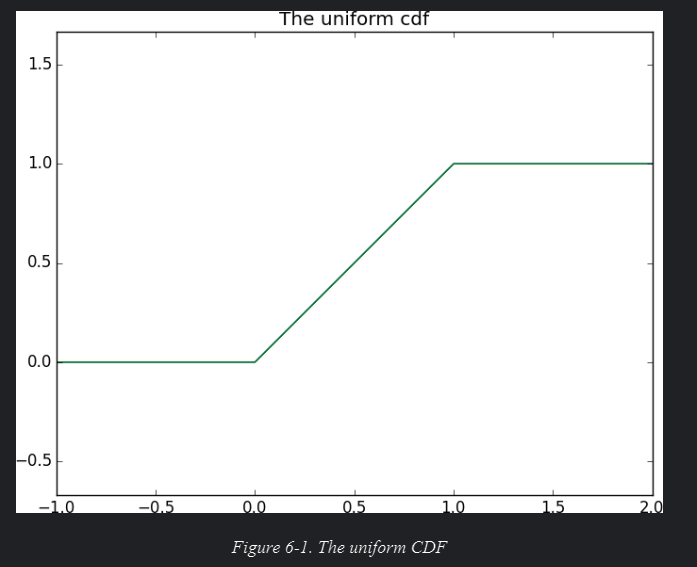

# The Normal Distribution

The normal distribution is the classic bell curve-shaped distribution and is completely determined by two parameters:
- its mean (mu) 
    - indicates where the bell is centered
- its standard deviation (sigma)
    - how wide it is

It has the PDF:

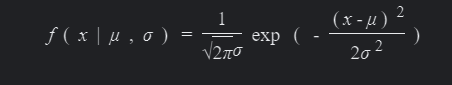

Which can be implemented as:

In [3]:
import math 
SQRT_TWO_PI = math.sqrt(2 + math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

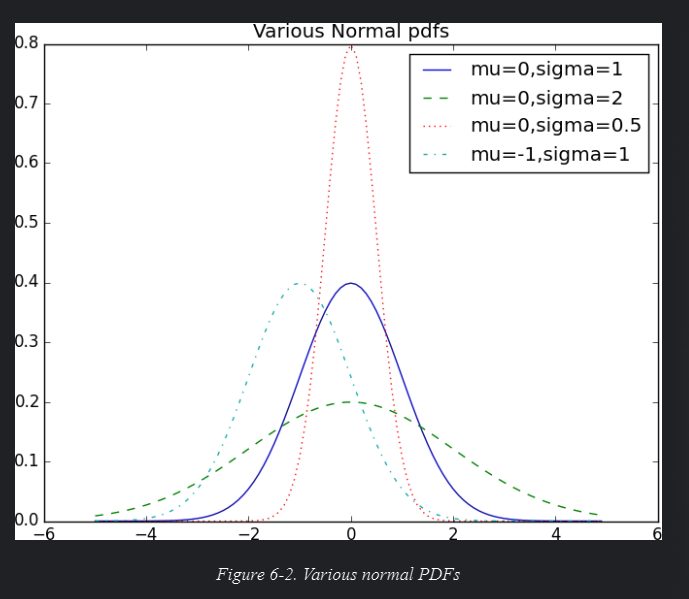

In this figure, we plot some of these PDFs to see what they look like:

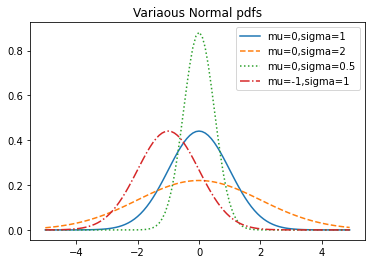

In [4]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50,50)]

plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')

plt.legend()
plt.title("Variaous Normal pdfs")
plt.show()


When mu = 0 and sigma = 1, it's called the *standard normal distribution*

If Z is a standard normal random variable, then it turns out that:

*X = sigma * Z + mu*

is also normal, but with mean mu and standard deviation sigma.


Conversly, if X is a normal random variable with mean mu and standard deviation sigma

Z = (X - mu) / sigma 

is a standard normal variable.

The CDF for the normal distribution cannot be written in an "elementary" manner, but we can write it using Python's math.erf (error function):

In [7]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) /2

We plot a few CDFs:

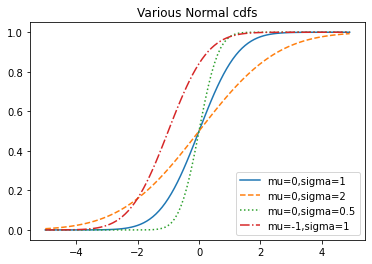

In [9]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')

plt.legend(loc=4)  # bottom right
plt.title("Various Normal cdfs")
plt.show()

Sometimes, we'll need to invert normal_cdf to find the value corresponding to a specified probability. 

There's no simple way to compute its inverse, but normal_cdf is continuous and stricly increasing, so we can use a *binary search:*

In [10]:
def inverse_normal_cdf(p: float,
                       mu: float=0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0                    # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0                      # normal_cdf(10) is (very close to) 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2   # consider the midpoint 
        mid_p = normal_cdf(mid_z)    # and the CDF's value there
        if mid_p < p: 
            low_z = mid_z            # midpoint too low, search above it
        else:
            hi_z = mid_z             # midpoint too high, search below it
    return mid_z
            

The function repeatedly bisects intervals until it narrows in on a Z that's close enough to the desired probability. 

# The Central Limit Theorem